In [1]:
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr, spearmanr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Load the Diabetes Dataset
diabetes= load_diabetes()

#Make it a dataframe
df_diab=pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
y=pd.Series(diabetes.target)

#Apply Dimentionality Reduction using PCA with variance 80%
df_diab=StandardScaler().fit_transform(df_diab)
data_pca=PCA(0.8).fit_transform(df_diab)

#Converting into a dataframe
df_pca=pd.DataFrame(data=data_pca)


#dividing a target (continuous) variable into n distinct bins or intervals
num_bins = 5  # Adjust the number of bins as needed
bins = pd.cut(y, bins=num_bins, labels=False)

#Applying stratified kfold (5 fold) Crossvalidation
skf=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

fold=0
for index_train, index_test in skf.split(df_pca,bins):
    X_train, x_test = df_pca.iloc[index_train], df_pca.iloc[index_test]
    Y_train, y_test = bins[index_train], bins[index_test]
    
    # Calculate proportions
    original_proportions = np.bincount(bins) / len(bins)
    train_proportions = np.bincount(Y_train) / len(Y_train)
    test_proportions = np.bincount(y_test) / len(y_test)
    
    # Display the proportions of the bins in Train and test set
    fold +=1
    print('####')
    print(f"Fold {fold}:")
    print('Check the Ratio of the bins in the Train and Test set---->')
    #print("Original dataset bin proportions:", original_proportions)
    print("Training set bin proportions:", train_proportions)
    print("Test set bin proportions:", test_proportions)
    #print("Training set bin distribution:", np.bincount(train_bins))
    #print("Test set bin distribution:", np.bincount(test_bins))
    print()
    
    # Check if the proportions are approximately equal
    #def compare_proportions(original, train, test, tolerance=0.02):
    #    return (np.allclose(original, train, atol=tolerance) and 
    #            np.allclose(original, test, atol=tolerance))

    #print("Proportions are approximately equal:", compare_proportions(original_proportions, train_proportions, test_proportions))
    
    ##oversampling the minority bins in TRAINING SET using imblearn lib
    ovs=SMOTE(sampling_strategy='minority')
    X_ovs, Y_ovs= ovs.fit_resample(X_train, Y_train)
    
    # Calculate proportions
    train_proportions = np.bincount(Y_ovs) / len(Y_ovs)
    
    # Display the proportions of the bins in Train and test set
    print('Check the Ratio of the bins in the Train after over sampling---->')
    print("Training set bin proportions:", train_proportions)
    print()
    
    #Random Forest Regressor
    model=RandomForestRegressor()
    model.fit(X_ovs, Y_ovs)
    
    #Prediction on test set
    Y_pred=model.predict(x_test)
    
    #Calculation of Performance metrics
    MAE=mean_absolute_error(y_test, Y_pred)
    print('MAE =', MAE)
    
    MSE=mean_squared_error(y_test, Y_pred)
    print('MSE =', MSE)
    
    RMSE=np.sqrt(MSE)
    print('RMSE =', RMSE)
    
    R_2=r2_score(y_test, Y_pred)
    print('R_2 =', R_2)
    
    pearson_corr, _= pearsonr(y_test, Y_pred)
    spearman_corr, _ = spearmanr(y_test, Y_pred)
    print('pearson_corr', pearson_corr, 'spearman_corr', spearman_corr)
    
    
    #Plotting Real vs Predicted
    #plt.scatter(y_test, Y_pred)
    #plt.show()



####
Fold 1:
Check the Ratio of the bins in the Train and Test set---->
Training set bin proportions: [0.26628895 0.29461756 0.20679887 0.18130312 0.0509915 ]
Test set bin proportions: [0.26966292 0.29213483 0.20224719 0.17977528 0.05617978]

Check the Ratio of the bins in the Train after over sampling---->
Training set bin proportions: [0.21412301 0.23690205 0.16628702 0.14578588 0.23690205]

MAE = 0.7625842696629214
MSE = 0.8862977528089889
RMSE = 0.9414338812731295
R_2 = 0.4029286868515054
pearson_corr 0.6474399169374069 spearman_corr 0.6245935351293572
####
Fold 2:
Check the Ratio of the bins in the Train and Test set---->
Training set bin proportions: [0.26628895 0.29461756 0.20679887 0.18130312 0.0509915 ]
Test set bin proportions: [0.26966292 0.29213483 0.20224719 0.17977528 0.05617978]

Check the Ratio of the bins in the Train after over sampling---->
Training set bin proportions: [0.21412301 0.23690205 0.16628702 0.14578588 0.23690205]

MAE = 0.7556179775280897
MSE = 0.8064662

## I will do Real vs Predicted value plot without divinding the target using bins
## This makes plot more easy to understand


####
Fold 1:
MAE = 48.02651685393259
MSE = 3487.4099865168546
RMSE = 59.0542969352515
R_2 = 0.3297971619502187
pearson_corr 0.5966267181573017 spearman_corr 0.5670241743275453


/Users/sourav/.pyenv/versions/anaconda3-2023.09-0/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


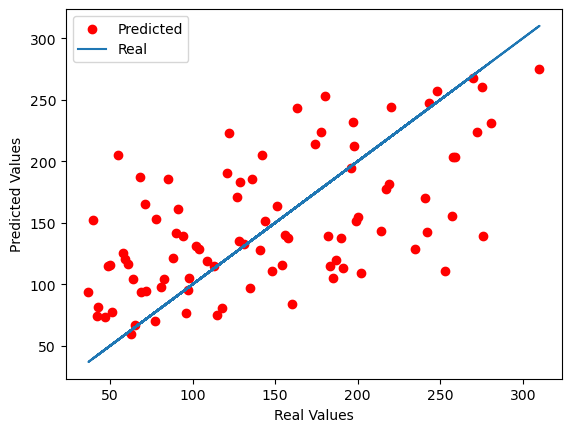

####
Fold 2:
MAE = 44.57292134831461
MSE = 3012.1113224719097
RMSE = 54.88270513077785
R_2 = 0.461935251786766
pearson_corr 0.6959318122270484 spearman_corr 0.6585914989483336


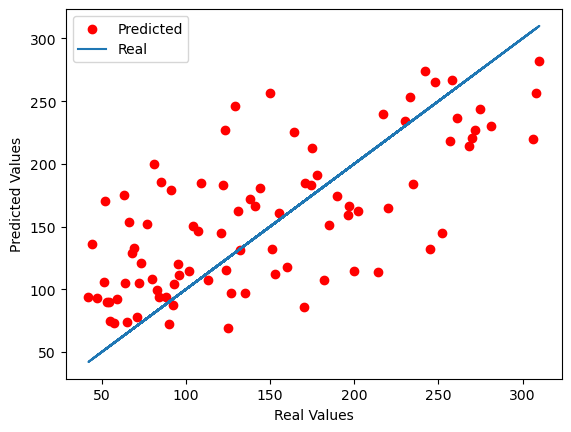

####
Fold 3:
MAE = 48.24431818181818
MSE = 3563.3689363636367
RMSE = 59.69396063559225
R_2 = 0.4107899324480412
pearson_corr 0.643779831459525 spearman_corr 0.6607316611475279


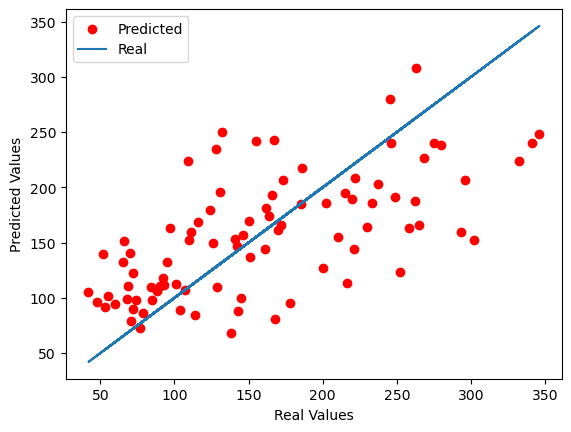

####
Fold 4:
MAE = 45.496818181818185
MSE = 3355.6859454545456
RMSE = 57.92828277667607
R_2 = 0.4801413961170292
pearson_corr 0.6975885781139799 spearman_corr 0.6783693704469015


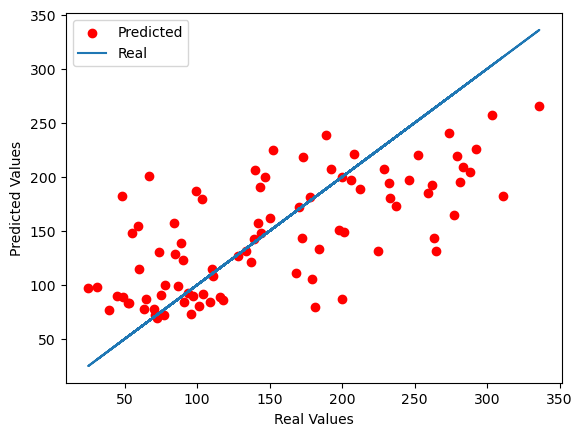

####
Fold 5:
MAE = 41.50715909090909
MSE = 2817.050180681818
RMSE = 53.07589076672965
R_2 = 0.5462622177592852
pearson_corr 0.7395814898765916 spearman_corr 0.7419957028635837


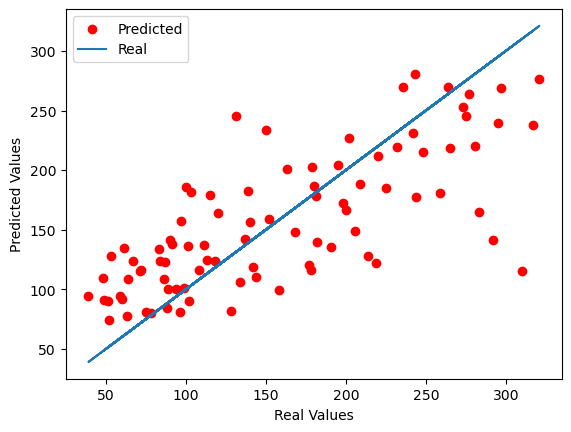

In [2]:
from imblearn.over_sampling import RandomOverSampler

#Load the Diabetes Dataset
diabetes= load_diabetes()

#Make it a dataframe
df_diab=pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
y=pd.Series(diabetes.target)

#Apply Dimentionality Reduction using PCA with variance 80%
df_diab=StandardScaler().fit_transform(df_diab)
data_pca=PCA(0.8).fit_transform(df_diab)

#Converting into a dataframe
df_pca=pd.DataFrame(data=data_pca)


#Applying stratified kfold (5 fold) Crossvalidation
skf=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

fold=0
all_y_gt = []
all_y_pred = []
for index_train, index_test in skf.split(df_pca,y):
    X_train, x_test = df_pca.iloc[index_train], df_pca.iloc[index_test]
    Y_train, y_test = y.iloc[index_train], y.iloc[index_test]
    
    
    # Display the proportions of the bins in Train and test set
    fold +=1
    print('####')
    print(f"Fold {fold}:")
    
   
    ##oversampling the minority bins in TRAINING SET using imblearn lib
    ovs=RandomOverSampler(sampling_strategy='minority')
    X_ovs, Y_ovs= ovs.fit_resample(X_train, Y_train)
    
    
    #Random Forest Regressor
    model=RandomForestRegressor()
    model.fit(X_ovs, Y_ovs)
    
    #Prediction on test set
    Y_pred=model.predict(x_test)
    
    #Calculation of Performance metrics
    MAE=mean_absolute_error(y_test, Y_pred)
    print('MAE =', MAE)
    
    MSE=mean_squared_error(y_test, Y_pred)
    print('MSE =', MSE)
    
    RMSE=np.sqrt(MSE)
    print('RMSE =', RMSE)
    
    R_2=r2_score(y_test, Y_pred)
    print('R_2 =', R_2)
    
    pearson_corr, _= pearsonr(y_test, Y_pred)
    spearman_corr, _ = spearmanr(y_test, Y_pred)
    print('pearson_corr', pearson_corr, 'spearman_corr', spearman_corr)
    
    #Saving all predictions from each fold
    all_y_gt.extend(y_test)
    all_y_pred.extend(Y_pred)

    
    #Plotting Real vs Predicted
    plt.scatter(y_test, Y_pred, c='red', label='Predicted')
    plt.plot(y_test, y_test, label='Real')
    plt.xlabel('Real Values')
    plt.ylabel('Predicted Values')
    
    plt.legend()
    plt.show()

MAE = 45.572850678733026
MSE = 3247.1371990950224
RMSE = 56.9836572983432
R_2 = 0.4524114286287645
pearson_corr 0.6739904426885149 spearman_corr 0.6643977392311229


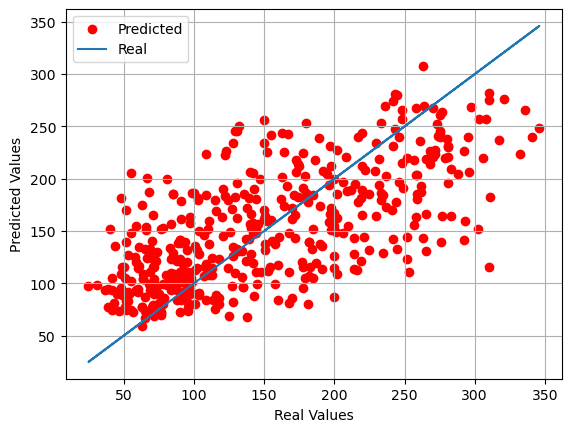

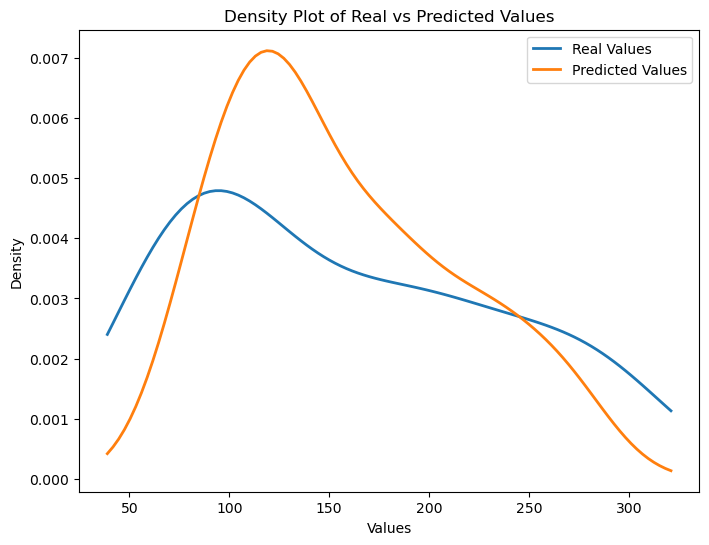

In [4]:
#final Performance metrics for the Entire dataset
from scipy.stats import gaussian_kde

MAE=mean_absolute_error(all_y_gt, all_y_pred)
print('MAE =', MAE)
    
MSE=mean_squared_error(all_y_gt, all_y_pred)
print('MSE =', MSE)
    
RMSE=np.sqrt(MSE)
print('RMSE =', RMSE)
    
R_2=r2_score(all_y_gt, all_y_pred)
print('R_2 =', R_2)
    
pearson_corr, _= pearsonr(all_y_gt, all_y_pred)
spearman_corr, _ = spearmanr(all_y_gt, all_y_pred)
print('pearson_corr', pearson_corr, 'spearman_corr', spearman_corr)

#Plotting Real vs Predicted
plt.scatter(all_y_gt, all_y_pred, c='red', label='Predicted')
plt.plot(all_y_gt, all_y_gt,label='Real')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.legend()
plt.show()


# Calculate density values for real and predicted values
density_real = gaussian_kde(y_test)
density_pred = gaussian_kde(Y_pred)

# Create a range of values for x-axis
x = np.linspace(min(np.min(y_test), np.min(Y_pred)), max(np.max(y_test), np.max(Y_pred)), 100)

# Plot density of real values
plt.figure(figsize=(8, 6))
plt.plot(x, density_real(x), label='Real Values', linewidth=2)

# Plot density of predicted values
plt.plot(x, density_pred(x), label='Predicted Values', linewidth=2)

# Add labels and title
plt.title('Density Plot of Real vs Predicted Values')
plt.xlabel('Values')
plt.ylabel('Density')

# Display legend
plt.legend()

# Show plot
plt.show()

import pandas as pd

# Sample continuous data
data = pd.Series(diabetes.target)

# Bin the data into 3 bins
bins = pd.cut(data, bins=5)

print(bins)